In [4]:
from Inception.data_loader import data_loader

train_dir = r"/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train"
test_dir = r"/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test"
batch_size = 64
img_shape = (299, 299)

train_data, val_data, test_data = data_loader(train_dir, test_dir, batch_size, img_shape)

Found 6633 files belonging to 2 classes.
Found 715 files belonging to 2 classes.
Training batches: 104
Validation batches: 6
Test batches: 6


In [5]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

train_labels = np.concatenate([y.numpy() for _, y in train_data])

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))

In [6]:
import keras

input_shape = (299, 299, 3)

keras.utils.set_random_seed(123)
base_model = keras.applications.InceptionV3(weights="imagenet", include_top=False, input_shape=input_shape)
base_model.trainable = False

inputs = keras.Input(shape=input_shape)
x = keras.applications.inception_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(units=1, activation="sigmoid")(x)
inception = keras.Model(inputs, outputs)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
from Inception.train import train

initial_epochs = 10
initial_learning_rate = 0.00001
threshold = 0.4
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
accuracy_metric = keras.metrics.BinaryAccuracy(threshold=threshold, name="accuracy")

history = train(
    model=inception,
    train_data=train_data,
    val_data=val_data,
    optimizer=optimizer,
    loss=loss,
    epochs=initial_epochs,
    accuracy_metric=accuracy_metric,
    class_weights_dict=class_weights_dict,
    verbose=False,
)

I0000 00:00:1734896020.958454      71 service.cc:145] XLA service 0x7ddcd4002a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734896020.958509      71 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1734896034.396231      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.6660 - f1_score: 0.8172 - loss: 0.6013 - precision: 0.8714 - recall: 0.7694
Training results on epoch 10:
Loss: 0.6020
Accuracy: %66.0
Precision: %86.0
Recall: %77.0
F1 Score: %81.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6634 - f1_score: 0.7889 - loss: 0.6071 - precision: 0.8644 - recall: 0.7260 
Validation results on epoch 10:
Loss: 0.6060
Accuracy: %69.0
Precision: %87.0
Recall: %72.0
F1 Score: %79.0


In [8]:
base_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [9]:
base_model.trainable = True

at = 100
for layer in base_model.layers[:at]:
    layer.trainable = False

Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5950 - f1_score: 0.7256 - loss: 0.7699 - precision: 0.5861 - recall: 0.9523
Epoch 10: val_loss improved from inf to 0.57124, saving model to Inception/best_net.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 90s 503ms/step - accuracy: 0.5950 - f1_score: 0.7257 - loss: 0.7693 - precision: 0.5862 - recall: 0.9524 - val_accuracy: 0.7341 - val_f1_score: 0.8031 - val_loss: 0.5712 - val_precision: 0.9000 - val_recall: 0.7251
Epoch 11/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.6563 - f1_score: 0.8079 - loss: 0.5403 - precision: 0.6885 - recall: 0.9776
Epoch 11: val_loss improved from 0.57124 to 0.37334, saving model to Inception/best_net.keras
104/104 ━━━━━━━━━━━━━━━━━━━━ 28s 265ms/step - accuracy: 0.6566 - f1_score: 0.8081 - loss: 0.5400 - precision: 0.6887 - recall: 0.9776 - val_accuracy: 0.8973 - val_f1_score: 0.9268 - val_loss: 0.3733 - val_precision: 0.9548 - val_recall: 0.9005
Epoch 12/50
104/104 ━━━━━━━━━━━━━━━━━━

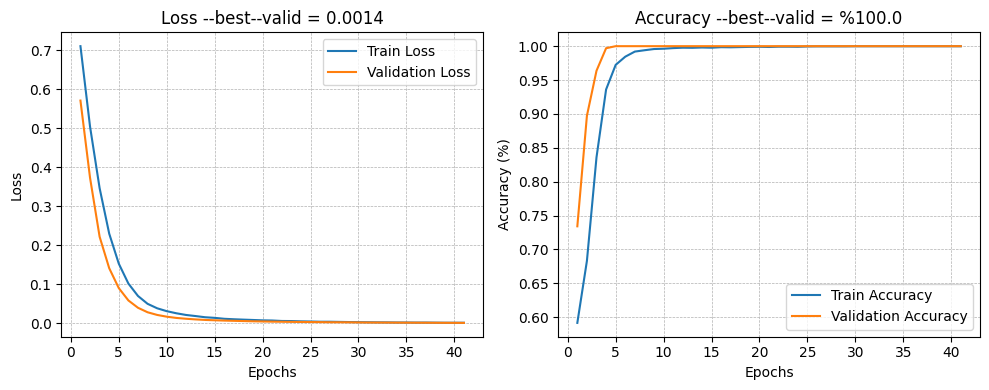

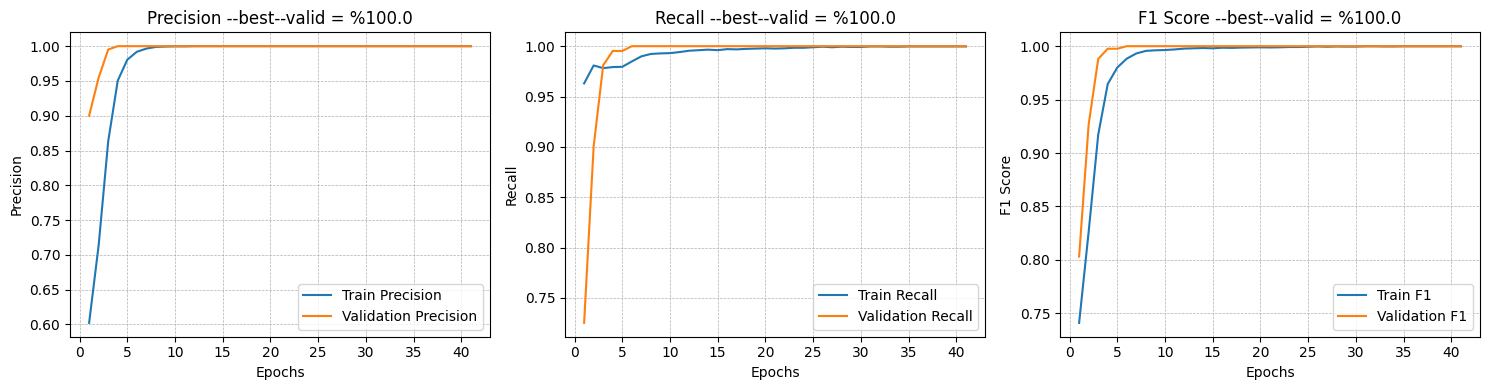

In [10]:
trial_dir = "Inception"
patience = 5
fine_tune_learning_rate = initial_learning_rate / 10
fine_tune_epochs = 40 + initial_epochs
optimizer= keras.optimizers.RMSprop(learning_rate=fine_tune_learning_rate)

history = train(
    model=inception,
    train_data=train_data,
    val_data=val_data,
    optimizer=optimizer,
    loss=loss,
    epochs=fine_tune_epochs,
    accuracy_metric=accuracy_metric,
    patience=patience,
    trial_dir=trial_dir,
    class_weights_dict=class_weights_dict,
    initial_epoch=history.epoch[-1],
    verbose=True,
)

Loss: 0.0158
Accuracy: %100.0
Precision: %100.0
Recall: %99.0
F1 Score: %100.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


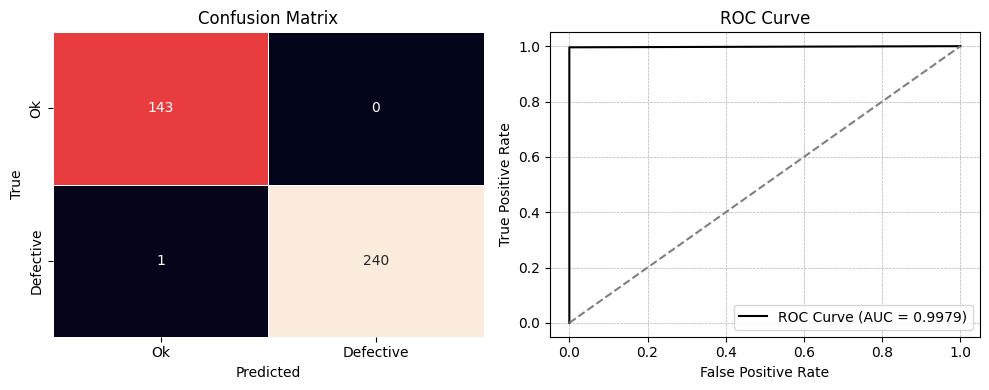

In [11]:
from Inception.evaluate import evaluate

evaluate(
    model=inception,
    data=test_data,
    threshold=threshold,
    trial_dir=trial_dir,
)